In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import time

In [3]:
with open('../input/anime-data-preprocessing/data.pickle', 'rb') as f:
    data = pickle.load(f)
with open('../input/anime-data-preprocessing/frequency_matrix.pickle', 'rb') as f:
    genres = pickle.load(f)    
with open('../input/anime-data-preprocessing/sypnopsis_matrix.pickle', 'rb') as f:
    synopsis = pickle.load(f)
with open('../input/anime-data-preprocessing/animes.pickle', 'rb') as f:
    animes = pickle.load(f)    

In [6]:
anime_id = pd.DataFrame(animes.iloc[:,0])

In [8]:
gensyn = pd.concat([anime_id,genres,synopsis],axis = 1)

In [9]:
gensyn.head(3)

,anime_id,action,adventure,cars,comedy,dementia,demons,drama,fantasy,game,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219417,0.0,0.0
1,5,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,6,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [10]:
genres.shape

(11858, 36)

In [11]:
synopsis.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,...,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000
mean,0.020491,0.027884,0.038760,0.039551,0.022241,0.017373,0.014179,0.021610,0.018390,0.017056,...,0.014656,0.012208,0.021021,0.018654,0.019102,0.015280,0.049252,0.022704,0.021469,0.025633
std,0.087709,0.131902,0.136089,0.102418,0.103636,0.084428,0.070903,0.090813,0.080055,0.094570,...,0.081483,0.075290,0.108963,0.090631,0.080045,0.079153,0.129990,0.084481,0.080625,0.089770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.664148,1.000000,1.000000,0.638205,1.000000,1.000000,1.000000,1.000000,0.890695,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Transform data for vector space model

In [12]:
newdf = []
for i in range(len(data)):
    a = gensyn[gensyn['anime_id'].isin(data[i]['anime_id'])].reset_index(drop=True)
    colname = data[i].columns[-1]
    a[colname] = data[i].iloc[:,-1]
    newdf.append(a)

In [13]:
new_df = []
for item in newdf:
    if item.shape[0]>=5000:
        new_df.append(item)

In [14]:
new_df[0]

,anime_id,action,adventure,cars,comedy,dementia,demons,drama,fantasy,game,...,91,92,93,94,95,96,97,98,99,score_by_user_10255
0,1,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.219417,0.000000,0.000000,10.0
1,5,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.0
2,6,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.0
3,7,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.294035,0.000000,0.250298,0.000000,0.000000,8.0
4,8,0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.228532,0.438215,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,45615,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
6105,45616,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
6106,45753,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
6107,47616,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


### Cosine similarity function

In [23]:
def cal_for_w(df, k=10, weight = None):
    '''
    Function for predicting rating with cosine similarity,
    output two dataframe with mean and weighted mean prediction and two rmse value for both.
    --------
    df is dataframe of one user
    ; first column is anime_id, last column is rating
    target is prediction target anime's anime_id list
    k is determined by how many similar anime will be used for rating prediction
    ----
    * every column value range should be [0,1] before giving weight
    '''
    
    # 한 유저 matrix당 한 번 사용
    
    start = time.time()  # 시작 시간 저장
    
    '''
    need pandas, numpy and below
    '''
    from sklearn.metrics.pairwise import cosine_similarity
    
    
    if weight == None:
        weight = np.ones(2)
    
    w1 = weight[0]
    w2 = weight[1]
    
    df = df.reset_index(drop = True)
    
    newdf = df.copy()
    newdf.iloc[:,1:37] = w1*newdf.iloc[:,1:37]
    newdf.iloc[:,37:-1] = w2*newdf.iloc[:,37:-1]
    
    df3 = df.copy()
    
    # calculate cosine similiarty
    cosim = np.round(cosine_similarity(newdf.iloc[:,1:-1], newdf.iloc[:,1:-1]), 4)
        
    for x in range(len(df)):
    
        sim_scores = [(i, c) for i, c in enumerate(cosim[x]) if i != x] # exclude targets
        sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) # 유사도가 높은 순서대로 정렬 
    
        sim_scores_df = pd.DataFrame(sim_scores)   
    
        # ksim is k similar animes' indices and rating in df
        ksim = sim_scores_df.iloc[:k,:]
        # simidx is k similar animes' indices in df
        simidx = ksim.iloc[:,0]

        # df3 estimate rating with weighted mean of k animes' similarity
        df3.iloc[x,-1] = np.round( np.dot(df3.iloc[simidx,-1], ksim.iloc[:,1])/np.sum(ksim.iloc[:,1]) , 2)
    
    
    # Evaluation
    
    from sklearn.metrics import mean_squared_error
    
    MSE3 = mean_squared_error(df.iloc[:,-1], df3.iloc[:,-1])
    
    print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
        
    return MSE3

In [30]:
def predict(df, target, k=10, weight = None):
    '''
    Function for predicting rating with cosine similarity,
    output two dataframe with mean and weighted mean prediction and two rmse value for both.
    --------
    df is dataframe of one user
    ; first column is anime_id, last column is rating
    target is prediction target anime's index
    k is determined by how many similar anime will be used for rating prediction
    ----
    * every column value range should be [0,1] before giving weight
    '''
    
    # 한 유저 matrix당 한 번 사용
    
    
    start = time.time()  # 시작 시간 저장
 
    '''
    need pandas, numpy and below
    '''
    from sklearn.metrics.pairwise import cosine_similarity

    if weight == None:
        weight = np.ones(2)
    
    w1 = weight[0]
    w2 = weight[1]
    
    newdf = df.copy()
    newdf.iloc[:,1:37] = w1*newdf.iloc[:,1:37]
    newdf.iloc[:,37:-1] = w2*newdf.iloc[:,37:-1]
    
    df_unseen = df.copy()
    
    df3 = df_unseen.copy()

    # calculate cosine similiarty
    cosim = np.round(cosine_similarity(df_unseen.iloc[:,1:-1], df_unseen.iloc[:,1:-1]), 4)
    
    for x in range(len(target)):
    
        sim_scores = [(i, c) for i, c in enumerate(cosim[target[x]]) if i not in target] # exclude targets
        sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) # 유사도가 높은 순서대로 정렬 
    
        sim_scores_df = pd.DataFrame(sim_scores)   
    
        # ksim is k similar animes' indices and rating in df
        ksim = sim_scores_df.iloc[:k,:]
        # simidx is k similar animes' indices in df
        simidx = ksim.iloc[:,0]
    
        df3.iloc[target[x],-1] = np.round( np.dot(df3.iloc[simidx,-1], ksim.iloc[:,1])/np.sum(ksim.iloc[:,1]) , 2)
    
    # Evaluation

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import r2_score
    
    evs = explained_variance_score(df.iloc[target,-1], df3.iloc[target,-1])
    r2 = r2_score(df.iloc[target,-1], df3.iloc[target,-1])
    MAE = mean_absolute_error(df.iloc[target,-1], df3.iloc[target,-1])
    MSE = mean_squared_error(df.iloc[target,-1], df3.iloc[target,-1])
    RMSE = np.sqrt(mean_squared_error(df.iloc[target,-1], df3.iloc[target,-1]))
    
    print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
    
    return df3,evs,r2,MAE,MSE,RMSE

### Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_train = []
df_test = []

In [22]:
for i in range(len(new_df)):
    tr, te = train_test_split(new_df[i],test_size = 0.2, random_state = 0)
    df_train.append(tr)
    df_test.append(te)

### find weight?

In [25]:
def find_w(df_train,w):
    
    '''
    input : df_train
    w: 가중치가 들어가있는 리스트
    '''
    total_mse = []
    
    for item in df_train:
    
    #item = one user's train set
            
        w_mse = []
        
        for i in range(len(w)):
            mse = 0
            mse += cal_for_w(item, weight = w[i])
            w_mse.append(mse)
        # w_mse len will be len(w)
        
        total_mse.append(w_mse)
        # total_mse len will be num of users -> 20*3
    
    print(total_mse)
    mean = np.mean(total_mse, axis = 0)
    minidx = np.argmin(mean)
    weight = w[minidx]
    
    return weight

#### check

In [26]:
w = [[0.7,0.3],[0.5,0.5],[0.3,0.7]]

In [27]:
weight = find_w(df_train,w)

time : 51.41855478286743
time : 51.07471799850464
time : 51.00753450393677
time : 42.364376068115234
time : 41.97873115539551
time : 42.28685474395752
time : 41.33152508735657
time : 41.07964372634888
time : 41.38322591781616
time : 42.208739042282104
time : 42.97132110595703
time : 42.779547452926636
time : 134.50487279891968
time : 136.07666158676147
time : 135.3335464000702
time : 43.128570318222046
time : 42.80998492240906
time : 43.174994707107544
time : 72.10131621360779
time : 71.96762275695801
time : 72.32278513908386
time : 157.21792364120483
time : 157.60844731330872
time : 159.76857805252075
time : 65.1772346496582
time : 64.68918681144714
time : 64.65132880210876
time : 165.16298651695251
time : 166.39763140678406
time : 164.8309257030487
time : 44.18908715248108
time : 44.433834075927734
time : 44.23369073867798
time : 84.6872730255127
time : 84.42516541481018
time : 84.6445038318634
time : 38.10298776626587
time : 37.96798133850098
time : 38.01280474662781
time : 59.70091

In [28]:
print(weight)

[0.5, 0.5]


### Predict
- Predict with previously found optimal weight

In [31]:
df_pre = []
evs = []
r2 = []
mae = []
mse = []
rmse = []

for i in range(len(new_df)):
    df3,e,r,MAE,MSE,RMSE = predict(new_df[i], df_test[i].index.values, weight = weight)
    df_pre.append(df3)
    evs.append(e)
    r2.append(r)
    mae.append(MAE)
    mse.append(MSE)
    rmse.append(RMSE)
    
mean_e = np.mean(evs)
mean_r2 = np.mean(r2)
mean_mae = np.mean(mae)
mean_mse = np.mean(mse)

print(mean_e,mean_r2,mean_mae,mean_mse)

time : 59.758824586868286
time : 48.81883478164673
time : 46.52421975135803
time : 46.838385343551636
time : 165.26534390449524
time : 47.83582925796509
time : 83.38791728019714
time : 198.36426496505737
time : 76.97520661354065
time : 209.14981961250305
time : 50.693867206573486
time : 102.15245604515076
time : 42.22257924079895
time : 70.33480882644653
time : 156.68241357803345
time : 80.17663478851318
time : 59.968971490859985
time : 51.92897915840149
time : 51.34201526641846
time : 85.97431254386902
0.19139923594472188 0.1901577495670712 1.0906904532742445 2.341074049065178


In [32]:
evs

[0.21760887347102287,
 0.2659654501134171,
 0.0,
 0.19416345544989821,
 -0.0635491623096418,
 0.14273378925494407,
 0.3150539920100236,
 1.0,
 0.1757441694365931,
 0.0075921076229102935,
 0.10767066368059386,
 0.15384367640313745,
 0.13790790158162713,
 0.1823897597959856,
 0.23249937490195582,
 0.2210087463003052,
 0.26940935885480766,
 -0.05736240654042346,
 0.31629510147972717,
 0.009009867387553716]

In [33]:
r2

[0.21428607271394795,
 0.26595614046084837,
 0.0,
 0.19405883031935345,
 -0.06422783354219663,
 0.13592907672440735,
 0.31482178398163063,
 1.0,
 0.1725398086085762,
 0.006588434315157987,
 0.10766929932546165,
 0.15381019447419952,
 0.13770672491680558,
 0.18234381796415555,
 0.2314128217766962,
 0.2203203894456316,
 0.2693771525494618,
 -0.05740173348436417,
 0.3162323032584574,
 0.0017317075331938492]

In [34]:
mae

[1.4422340425531917,
 1.0507142857142857,
 0.0018709677419354832,
 1.5871666666666666,
 1.810394802598701,
 1.3745722171113157,
 1.0426834381551362,
 0.0,
 1.6530079537237887,
 0.08422232182877633,
 1.3711932324131788,
 1.7513501577287067,
 1.1034496124031008,
 0.7881411229135052,
 0.5501801338136901,
 1.3286671418389164,
 1.166672131147541,
 0.9883936451897616,
 1.0190256864481841,
 1.6998695054945057]

In [35]:
mse

[3.3888084288052376,
 1.7901915913200723,
 0.0005431336405529951,
 4.02263037037037,
 5.066492953523238,
 2.9821276908923644,
 1.8987172606568832,
 0.0,
 4.01781453362256,
 0.08769529359031825,
 2.91296714158504,
 4.663230094637224,
 1.9763211240310075,
 1.026596433990895,
 0.5295006690684508,
 2.6607558089807553,
 2.2909395081967214,
 1.3438631067961164,
 1.6982889282550928,
 4.4639969093406595]

In [36]:
rmse

[1.8408716491937285,
 1.3379804151481711,
 0.02330522775157958,
 2.0056496130606587,
 2.2508871481092156,
 1.7268838093202346,
 1.3779394981844753,
 0.0,
 2.0044486857045154,
 0.2961339115844692,
 1.7067416739463064,
 2.1594513411135763,
 1.405816888513937,
 1.013210952364262,
 0.7276679662239165,
 1.6311823346826544,
 1.5135849854556305,
 1.1592510973883599,
 1.3031841497866266,
 2.1128172919920596]

In [37]:
print(np.std(evs),np.std(r2),np.std(mae),np.std(mse),np.std(rmse))

0.21727555616070676 0.21772220968937941 0.5488606003990814 1.5490731661103858 0.6611254301872075


In [39]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Users')

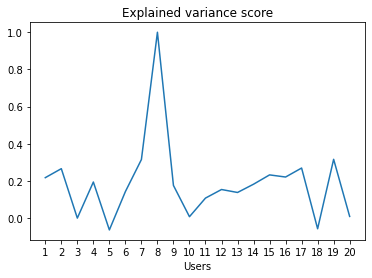

In [49]:
plt.plot(list(range(1,21)),evs)
plt.xticks(list(range(1,21)))
plt.title('Explained variance score')
plt.xlabel("Users")

Text(0.5, 0, 'Users')

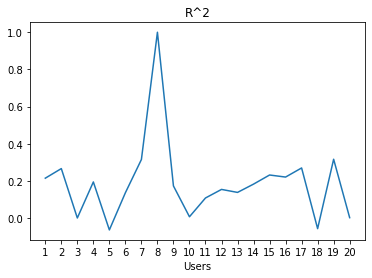

In [50]:
plt.plot(list(range(1,21)),r2)
plt.xticks(list(range(1,21)))
plt.title('R^2')
plt.xlabel("Users")

Text(0.5, 0, 'Users')

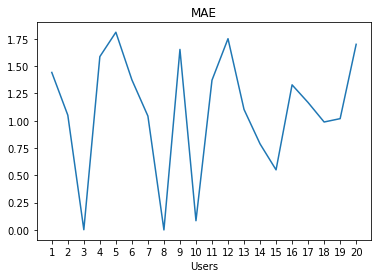

In [51]:
plt.plot(list(range(1,21)),mae)
plt.xticks(list(range(1,21)))
plt.title('MAE')
plt.xlabel("Users")

Text(0.5, 0, 'Users')

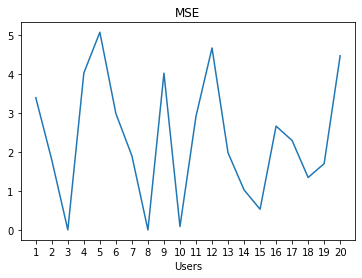

In [52]:
plt.plot(list(range(1,21)),mse)
plt.xticks(list(range(1,21)))
plt.title('MSE')
plt.xlabel("Users")

Text(0.5, 0, 'Users')

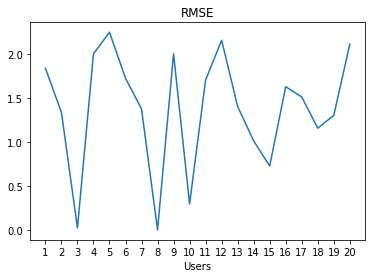

In [53]:
plt.plot(list(range(1,21)),rmse)
plt.xticks(list(range(1,21)))
plt.title('RMSE')
plt.xlabel("Users")